In [1]:
import struct

In [2]:
snapNum = 73
MPIrank = 1
filename = f"./sink_props/part_{snapNum:05d}.out{MPIrank:05d}"

# Check the data

In [6]:
import os
file_size = os.path.getsize(filename)
file_size

30278444

In [7]:
with open(filename, 'rb') as file:
    file.seek(0, 2)
    file_size = file.tell()
file_size

30278444

In [8]:
file_size_check = 0

with open(filename, 'rb') as file:
    
    nvar_header = 8
    """
    output_part.f90:
    ! Write header
      write(ilun)ncpu
      write(ilun)ndim
      write(ilun)npart
      write(ilun)localseed
      write(ilun)nstar_tot   
      write(ilun)mstar_tot   
      write(ilun)mstar_lost
      write(ilun)nsink
    """
    
    for i in range(nvar_header):
        
        header_size = struct.unpack('i', file.read(4))[0]
        print(header_size)

        
        if header_size == 4:
            value = struct.unpack('i', file.read(header_size))[0]
        
        if header_size == 8:
            value = struct.unpack('q', file.read(header_size))[0]
        
        if header_size == 16:
            size = 4 # header_size = 4 * size
            value = struct.unpack('4i', file.read(header_size))
        print(value)
        
        tail_size = struct.unpack('i', file.read(4))[0]
        file_size_check += tail_size + 8
        print(tail_size)
        print("\n")
    
    # read(dp)::xdp - 8 byte
    # integer::ii, ll - 4 byte
    # integer(i8b)::ii8 - 8 byte
    
    for _ in range(3+3+1+1):
        # xp: pos - xdp
        # vp: vel - xdp
        # mp: mass - xdp
        # idp: id - ii8
        header_size = struct.unpack('i', file.read(4))[0]
        print(header_size)
        for _ in range(261019):
            struct.unpack('d', file.read(8))[0]
        tail_size = struct.unpack('i', file.read(4))[0]
        file_size_check += tail_size + 8
        print(tail_size)
        print("\n")
    
    # levelp: level - ll
    header_size = struct.unpack('i', file.read(4))[0]
    print(header_size)
    for _ in range(261019):
        struct.unpack('i', file.read(4))[0]
    tail_size = struct.unpack('i', file.read(4))[0]
    file_size_check += tail_size + 8
    print(tail_size)
    print("\n")
    
    # ifdef OUTPUT_PARTICEL_POTENTIL
    for _ in range(6):
        header_size = struct.unpack('i', file.read(4))[0]
        print(header_size)
        for _ in range(261019):
            struct.unpack('d', file.read(8))[0]
        tail_size = struct.unpack('i', file.read(4))[0]
        file_size_check += tail_size + 8
        print(tail_size)
        print("\n")

#     # ifdef OUTPUT_PARTICEL_POTENTIL
#     header_size = struct.unpack('i', file.read(4))[0]
#     print(header_size)
#     for _ in range(261019):
#         struct.unpack('d', file.read(8))[0]
#     tail_size = struct.unpack('i', file.read(4))[0]
#     file_size_check += tail_size
#     print(tail_size)
#     print("\n")
    
#     # if(star .or. sink)then
#     # tp: birth epoch - xdp
#     header_size = struct.unpack('i', file.read(4))[0]
#     print(header_size)
#     for _ in range(261019):
#         struct.unpack('d', file.read(8))[0]
#     tail_size = struct.unpack('i', file.read(4))[0]
#     file_size_check += tail_size
#     print(tail_size)
#     print("\n")
    
#     # zp: metallicity - xdp
#     header_size = struct.unpack('i', file.read(4))[0]
#     print(header_size)
#     for _ in range(261019):
#         struct.unpack('d', file.read(8))[0]
#     tail_size = struct.unpack('i', file.read(4))[0]
#     file_size_check += tail_size
#     print(tail_size)
#     print("\n")
    
#     # tpp: birth epoch (proper time) - xdp
#     header_size = struct.unpack('i', file.read(4))[0]
#     print(header_size)
#     for _ in range(261019):
#         struct.unpack('d', file.read(8))[0]
#     tail_size = struct.unpack('i', file.read(4))[0]
#     file_size_check += tail_size
#     print(tail_size)
#     print("\n")
    
#     # mp0: mass (initial) - xdp
#     header_size = struct.unpack('i', file.read(4))[0]
#     print(header_size)
#     for _ in range(261019):
#         struct.unpack('d', file.read(8))[0]
#     tail_size = struct.unpack('i', file.read(4))[0]
#     file_size_check += tail_size
#     print(tail_size)
#     print("\n")
    
#     # indtab: indtab (checkpoint in yield table) - xdp
#     header_size = struct.unpack('i', file.read(4))[0]
#     print(header_size)
#     for _ in range(261019):
#         struct.unpack('d', file.read(8))[0]
#     tail_size = struct.unpack('i', file.read(4))[0]
#     file_size_check += tail_size
#     print(tail_size)
#     print("\n")
    

4
600
4


4
3
4


4
261019
4


16
(1489, 3503, 1747, 1684)
16


8
4248112
8


8
4513066767575247960
8


8
4481462703060179995
8


4
18831
4


2088152
2088152


2088152
2088152


2088152
2088152


2088152
2088152


2088152
2088152


2088152
2088152


2088152
2088152


2088152
2088152


1044076
1044076


2088152
2088152


2088152
2088152


2088152
2088152


2088152
2088152


2088152
2088152


2088152
2088152




In [9]:
2088152 / 261019, 1044076 / 261019

(8.0, 4.0)

In [10]:
file_size_check

30278444

In [11]:
file_size - file_size_check

0

# Script

In [38]:
def read_header(file):
    """
    Reads a padded value from a binary file.
    Each block contains [header_size][value][tail_size].
    """
    header_size = struct.unpack('i', file.read(4))[0]
    
    if   header_size ==  4: value = struct.unpack('i', file.read(header_size))[0]
    elif header_size ==  8: value = struct.unpack('q', file.read(header_size))[0]
    elif header_size == 16: value = struct.unpack('4i', file.read(header_size))
    else:
        raise ValueError(f"Unexpected header size: {header_size} bytes")
    
    tail_size = struct.unpack('i', file.read(4))[0]
    
    if header_size != tail_size:
        raise ValueError(f"Size mismatch: header_size={header_size}, tail_size={tail_size}")
    
    return value

In [39]:
def read_data(file, npart, dtype=np.float64):
    header_size = struct.unpack('i', file.read(4))[0]
    data = np.fromfile(file, dtype=dtype, count=npart)
    tail_size = struct.unpack('i', file.read(4))[0]
    
    if header_size != tail_size:
        raise ValueError(f"Size mismatch: header_size={header_size}, tail_size={tail_size}")
    
    return data

In [40]:
def read_output(filename, fields=None):
    
    data = {}

    with open(filename, 'rb') as file:
        """
        output_part.f90:
        ! Write header
          write(ilun)ncpu
          write(ilun)ndim
          write(ilun)npart #per MPI rank
          write(ilun)localseed
          write(ilun)nstar_tot #in total box
          write(ilun)mstar_tot #in total box
          write(ilun)mstar_lost
          write(ilun)nsink # bh
        """

        # Read all header values
        ncpu = read_header(file)
        ndim = read_header(file)
        npart = read_header(file)
        localseed = read_header(file)
        nstar_tot = read_header(file)
        mstar_tot = read_header(file)
        mstar_lost = read_header(file)
        nsink = read_header(file)

        # Save header information
        data['header'] = {
            'ncpu': ncpu,
            'ndim': ndim,
            'npart': npart,
            'localseed': localseed,
            'nstar_tot': nstar_tot,
            'mstar_tot': mstar_tot,
            'mstar_lost': mstar_lost,
            'nsink': nsink
        }


        # Read data
        positions = np.zeros((npart, ndim))
        positions[:, 0] = read_data(file, npart, dtype=np.float64)
        positions[:, 1] = read_data(file, npart, dtype=np.float64)
        positions[:, 2] = read_data(file, npart, dtype=np.float64)
        data['positions'] = positions

        velocities = np.zeros((npart, ndim))
        velocities[:, 0] = read_data(file, npart, dtype=np.float64)
        velocities[:, 1] = read_data(file, npart, dtype=np.float64)
        velocities[:, 2] = read_data(file, npart, dtype=np.float64)
        data['velocities'] = velocities

        data['masses']  = read_data(file, npart, dtype=np.float64)
        data['ids']     = read_data(file, npart, dtype=np.int64)
        data['levels']  = read_data(file, npart, dtype=np.int32)
        data['phi']      = read_data(file, npart, dtype=np.float64)
        data['tc_birth'] = read_data(file, npart, dtype=np.float64)
        data['metal']    = read_data(file, npart, dtype=np.float64)
        data['tp_birth'] = read_data(file, npart, dtype=np.float64)
        data['masses0']  = read_data(file, npart, dtype=np.float64)
        data['indtab']   = read_data(file, npart, dtype=np.float64)

    # If specific fields are requested, filter data
    if fields:
        filtered_data = {field: data[field] for field in fields if field in data}
        return filtered_data
    
    return data


In [43]:
snapNum = 50
MPIrank = 1
filename = f"./lmin07-hr5-32-01-grammar/part_{snapNum:05d}.out{MPIrank:05d}"

In [44]:
read_output(filename)#, fields=['header', 'positions'])

{'header': {'ncpu': 32,
  'ndim': 3,
  'npart': 91384,
  'localseed': (1545, 1026, 2462, 294),
  'nstar_tot': 314386,
  'mstar_tot': 4548894580634390109,
  'mstar_lost': 4513639190245627729,
  'nsink': 535},
 'positions': array([[0.14905173, 0.1945461 , 0.08714121],
        [0.1626257 , 0.1002832 , 0.08385695],
        [0.20667225, 0.3773898 , 0.11110965],
        ...,
        [0.18430355, 0.02838228, 0.24720689],
        [0.24869117, 0.11777338, 0.03940774],
        [0.31643551, 0.00075918, 0.03657383]]),
 'velocities': array([[ 0.00612869, -0.01540771, -0.01188003],
        [ 0.00841629, -0.00740854, -0.01374081],
        [ 0.02059858, -0.00159738, -0.0059147 ],
        ...,
        [-0.00443076,  0.0020463 , -0.00543971],
        [-0.01874456, -0.03365232, -0.04121512],
        [ 0.01260981,  0.01053537,  0.00088548]]),
 'masses': array([3.90639672e-07, 3.90639672e-07, 3.90639672e-07, ...,
        3.90639672e-07, 3.90639672e-07, 3.90639672e-07]),
 'ids': array([     12,      15,    

# Total file size

In [48]:
import os

MPIrank_tot = 32
snapNum = 50
file_size = 0

for MPIrank in range(1, MPIrank_tot+1):
    filename = f"./lmin07-hr5-32-01-grammar/part_{snapNum:05d}.out{MPIrank:05d}"
    file_size += os.path.getsize(filename)

print(f"{file_size/1e9:,.3f} Gb")

0.296 Gb


In [49]:
# memory for the specific values

# Total particle number

In [50]:
MPIrank_tot = 32
snapNum = 50
npart_tot = 0

for MPIrank in range(1, MPIrank_tot+1):
    filename = f"./lmin07-hr5-32-01-grammar/part_{snapNum:05d}.out{MPIrank:05d}"
    data = read_output(filename, fields=['header'])
    npart_tot += data['header']['npart']

print(f"{npart_tot:,.0f}")

2,549,033


In [52]:
MPIrank_tot = 32
snapNum = 50
npart_tot = 0

for MPIrank in range(1, MPIrank_tot+1):
    filename = f"./lmin07-hr5-32-01-grammar/part_{snapNum:05d}.out{MPIrank:05d}"
    data = read_output(filename, fields=['header', 'positions', 'tc_birth', 'tp_birth'])

In [60]:
header = data['header']

x = data['positions'][:,0]
y = data['positions'][:,1]
z = data['positions'][:,2]

tc_birth = data['tc_birth']
tp_birth = data['tp_birth']

In [61]:
header

{'ncpu': 32,
 'ndim': 3,
 'npart': 56189,
 'localseed': (3345, 444, 3301, 1834),
 'nstar_tot': 314386,
 'mstar_tot': 4545736810307601057,
 'mstar_lost': 4509461235515184364,
 'nsink': 535}

<IPython.core.display.Javascript object>


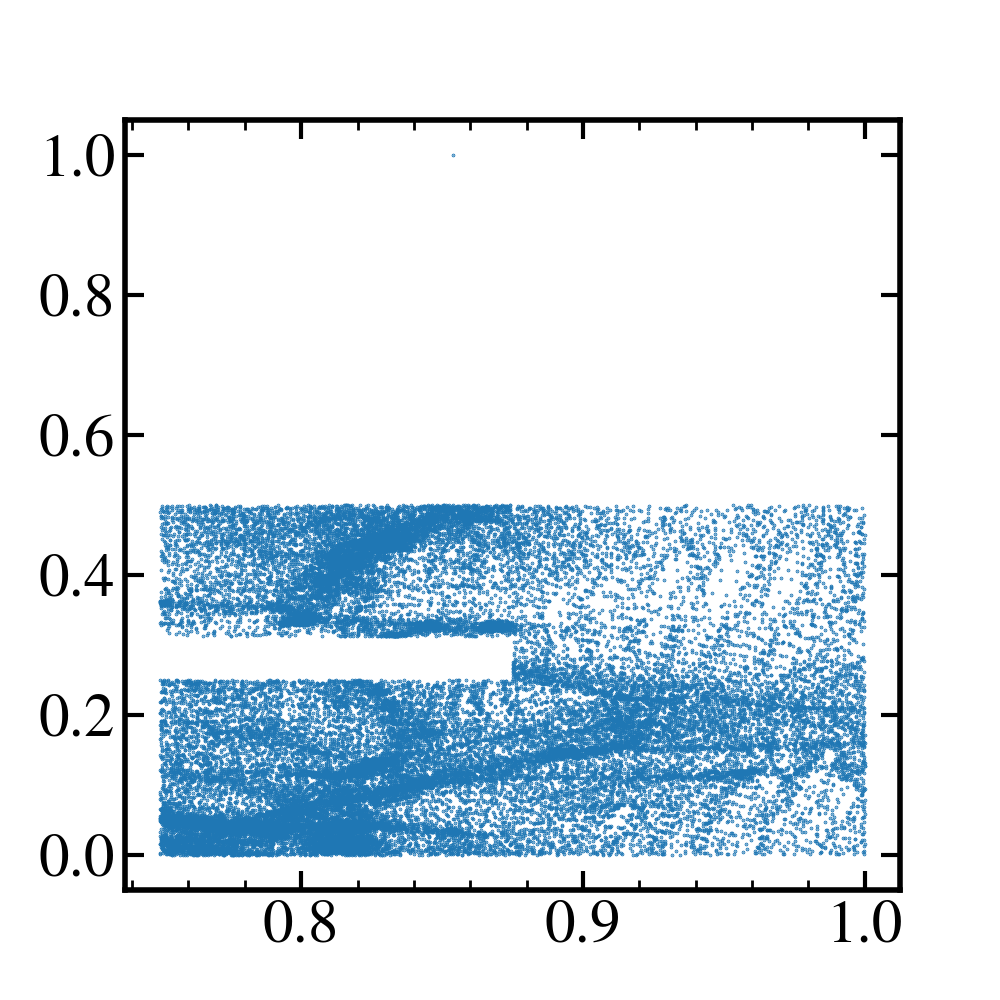

In [58]:
plt.figure(figsize=(5, 5))
plt.scatter(x,y,s=0.1)

<IPython.core.display.Javascript object>


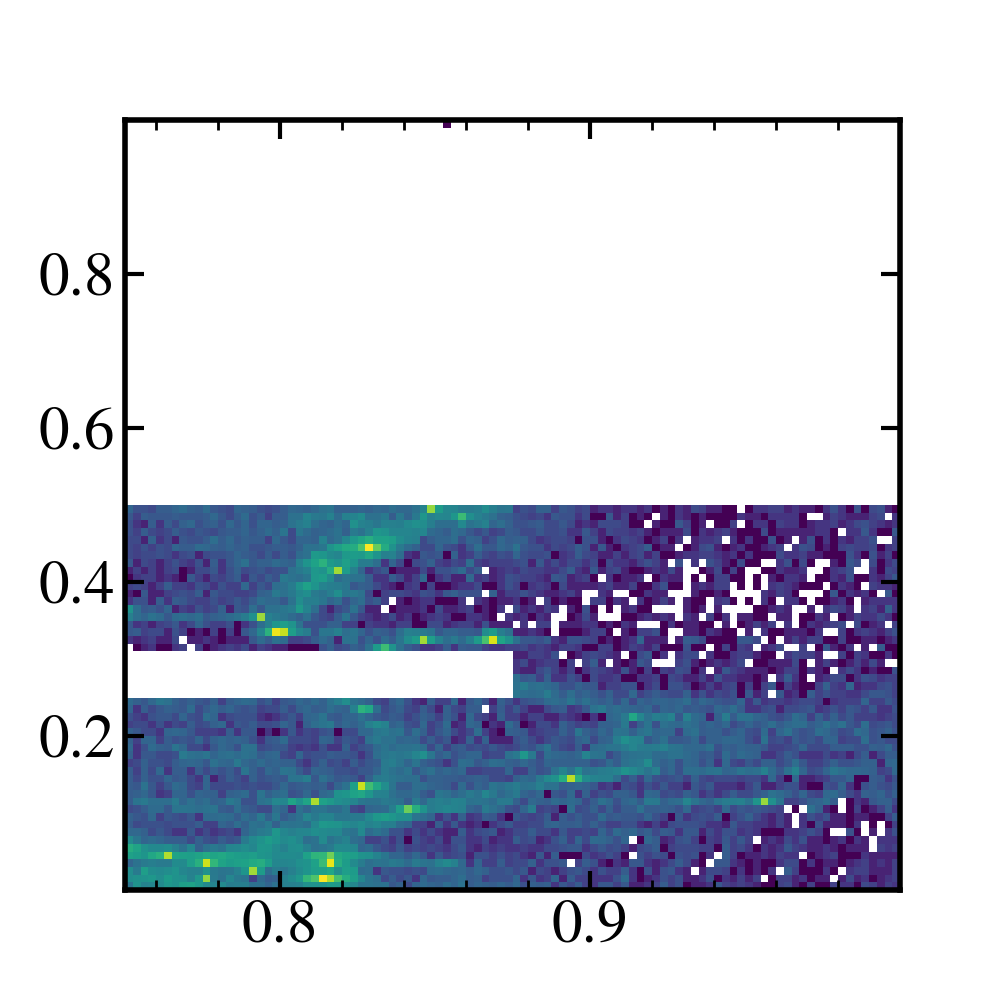

(array([[16., 33., 33., ...,  0.,  0.,  0.],
        [40., 37., 19., ...,  0.,  0.,  0.],
        [25., 40., 55., ...,  0.,  0.,  0.],
        ...,
        [ 2.,  2.,  2., ...,  0.,  0.,  0.],
        [ 4.,  3.,  2., ...,  0.,  0.,  0.],
        [ 3.,  4.,  4., ...,  0.,  0.,  0.]]),
 array([0.74999285, 0.75249271, 0.75499257, 0.75749243, 0.75999228,
        0.76249214, 0.764992  , 0.76749186, 0.76999172, 0.77249157,
        0.77499143, 0.77749129, 0.77999115, 0.78249101, 0.78499087,
        0.78749072, 0.78999058, 0.79249044, 0.7949903 , 0.79749016,
        0.79999001, 0.80248987, 0.80498973, 0.80748959, 0.80998945,
        0.81248931, 0.81498916, 0.81748902, 0.81998888, 0.82248874,
        0.8249886 , 0.82748845, 0.82998831, 0.83248817, 0.83498803,
        0.83748789, 0.83998775, 0.8424876 , 0.84498746, 0.84748732,
        0.84998718, 0.85248704, 0.85498689, 0.85748675, 0.85998661,
        0.86248647, 0.86498633, 0.86748619, 0.86998604, 0.8724859 ,
        0.87498576, 0.87748562, 0.8

In [59]:
import matplotlib as mpl
plt.figure(figsize=(5, 5))
plt.hist2d(x, y, bins=100, norm=mpl.colors.LogNorm())